# Исследование тарифов сотовой связи


В данной проектной работе мы выполняем исследование для компании "Мегалайн" - федерального оператора сотовой связи. Клиентам компании предлагают два тарифных плана: "Смарт" и "Ультра". Чтобы скорректировать рекламный бюджет, необходимо понять, какой тариф приносит больше денег.

В нашем распоряжении небольшая выборка клиентов - 500 пользователей "Мегалайна" и данные о них за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод - какой тариф лучше.



Анализ данных будем проводить в несколько этапов:

[Шаг 1. Изучение общей информации](#section1)

[Шаг 2. Подготовка данных](#section2)

[Шаг 3. Анализ данных](#section3)

[Шаг 4. Проверка гипотез](#section4)

[Шаг 5. Общий вывод](#section5)


<a id='section1'></a>
## Шаг 1. Изучение общей информации


На данном этапе мы загрузим файлы с данными и просмотрим их.


In [1]:
#импортируем необходимые для работы над проектом библиотеки
from scipy import stats as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#загружаем данные из файлов
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [3]:
#посмотрим загруженные данные
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [5]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [6]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [7]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra



Таким образом, у нас есть пять загруженных таблиц данных. Подытожим увиденную информацию.



<b> Таблица users - информация о пользователях: </b>
* <i> user_id </i> - уникальный идентификатор пользователя
* <i> first_name </i> - имя пользователя
* <i> last_name </i> - фамилия пользователя
* <i> age </i> - возраст пользователя в годах
* <i> reg_date </i> - дата подключения тарифа (день, месяц, год)
* <i> churn_date </i> - дата прекращения пользования тарифом
* <i> city </i> - город проживания пользователя
* <i> tariff </i> - название тарифного плана



<b> Таблица calls - информация о звонках: </b>
* <i> user_id </i> - уникальный идентификатор пользователя
* <i> id </i> - уникальный номер звонка
* <i> call_date </i> - дата звонка
* <i> duration </i> - длительность звонка в минутах



<b> Таблица messages - информация о сообщениях: </b>
* <i> user_id </i> - уникальный идентификатор пользователя
* <i> id </i> - уникальный номер сообщения
* <i> message_date </i> - дата сообщения



<b> Таблица internet - информация об интернет-сессиях: </b>
* <i> user_id </i> - уникальный идентификатор пользователя
* <i> id </i> - уникальный номер сессии
* <i> mb_used </i> - объем потраченного за сессию интернет-трафика в мегабайтах
* <i> session_date </i> - дата интернет-сессии



<b> Таблица tariffs - информация о тарифах: </b>
* <i> tariff_name </i> - название тарифа
* <i> rub_monthly_fee </i> - ежемесячная абонентская плата в рублях
* <i> minutes_included </i> - количество минут разговора в месяц, включенных в абонентскую плату
* <i> messages_included </i> - количество сообщений в месяц, включенных в абонентскую плату
* <i> mb_per_month_included </i> - объем интернет-трафика в мегабайтах, включенного в абонентскую плату
* <i> rub_per_minute </i> - стоимость минуты разговора сверх тарифного пакета
* <i> rub_per_message </i> - стоимость отправки сообщения сверх тарифного пакета
* <i> rub_per_gb </i> - стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета


### Вывод


На данном этапе мы загрузили полученные файлы с данными и описали общую информацию по ним. Таким образом, мы получили пять таблиц. Эти таблицы нужно проверить на наличие ошибок, обработать их и, для удобства дальнейшего анализа, объединить их в одну. Это задача для следующего этапа проекта.


<a id='section2'></a>
## Шаг 2. Подготовка данных


Следующий необходимый и важный пункт работы - предобработка данных.

Посмотрим информацию по таблице <i>calls</i>.


In [8]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB



Видим, что столбец <i>call_date</i> имеет тип "объект", а не "дата". Изменим тип данных этого столбца.


In [9]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')


Посмотрим, какие значения принимают данные этой таблицы.


In [10]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000



Видим, что встречаются значения длительности звонков, равные 0. Вероятно, звонящий не мог дозвониться, на другом конце провода никто не взял трубку, однако звонок был посчитан. Эти данные в дальнейшем могут в дальнейшем привести к неверным расчетам и занизить среднее значение длительности звонка. При подсчете количества ежемесячных сделанных звонков их лучше не учитывать (на общую сумму израсходованных минут в месяц они все равно не повлияют).


In [11]:
calls_without_zeros = calls[calls['duration'] != 0]


Для анализа данных нам потребуется помесячная информация об активности пользователей. Поэтому добавим в таблицу допольнительный столбец, вычисляющий месяц даты звонка и вычислим сумму и количество сделанных в этом месяце звонков по каждому пользователю.


In [12]:
calls_without_zeros['month'] = calls_without_zeros['call_date'].values.astype('datetime64[M]')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
calls_without_zeros['duration'] = calls_without_zeros['duration'].apply(lambda x: int(math.ceil(x)))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
#группируем звонки по пользователю и месяцу и вычисляем сумму и количество сделанных звонков ежемесячно
calls_fin = calls_without_zeros.groupby(['user_id', 'month'])[['duration']].agg(['sum', 'count']).reset_index()
calls_fin.columns = ['user_id', 'month', 'duration', 'call_count']
calls_fin.head()

,user_id,month,duration,call_count
0,1000,2018-05-01,159,17
1,1000,2018-06-01,172,28
2,1000,2018-07-01,340,41
3,1000,2018-08-01,408,42
4,1000,2018-09-01,466,46



Мы получили очень удобную таблицу, содержащую необходимую нам информацию по пользователям.

Теперь посмотрим информацию по таблице с отправленными сообщениями.


In [15]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB



Для этой таблицы также применим некоторые преобразования. Нам необходимо изменить тип данных столбца <i>message_date</i>, как и в случае со звонками. А также посчитать количество отправленных сообщений каждым пользователем по месяцам. Для этого также добавим отдельный столбец <i>month</i>.


In [16]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages['month'] = messages['message_date'].values.astype('datetime64[M]')
message_fin = messages.groupby(['user_id', 'month'])[['id']].agg(['count']).reset_index()
message_fin.columns = ['user_id', 'month', 'count']
message_fin.head()

,user_id,month,count
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57



Теперь просмотрим информацию по таблице, содержащей информацию об интернет-сессиях.


In [17]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB



По аналогии с предыдущими таблицами изменим тип данных столбца <i>session_date</i>, добавим столбец <i>month</i> и посчитаем количество потраченного интернет-трафика.


In [18]:
internet['mb_used'] = internet['mb_used'].apply(lambda x: int(math.ceil(x)))

In [19]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['month'] = internet['session_date'].values.astype('datetime64[M]')
internet_fin = internet.groupby(['user_id', 'month'])[['mb_used']].agg(['sum']).reset_index()
internet_fin.columns = ['user_id', 'month', 'mb_used']
internet_fin.head()

,user_id,month,mb_used
0,1000,2018-05-01,2256
1,1000,2018-06-01,23257
2,1000,2018-07-01,14016
3,1000,2018-08-01,14070
4,1000,2018-09-01,14581



Теперь нам необходимо объединить все таблицы в одну, содержащую информацию о пользователях и их ежемесячной активности.


In [20]:
#вычисляем временные отрезки для создания периода
min_month = calls['call_date'].values.astype('datetime64[M]').min()
max_month = calls['call_date'].values.astype('datetime64[M]').max()
(min_month, max_month)

(numpy.datetime64('2018-01'), numpy.datetime64('2018-12'))

In [21]:
#создаем период с учетом минимальной и максимальной даты, т.е. на весь 2018 год
period = pd.DataFrame(pd.date_range(min_month, max_month, freq='MS'))
period.columns = ['month']

In [22]:
#создаем фиктивный столбец, по которому объединим две таблицы, чтобы по каждому пользователю была каждая дата
period['key'] = 1
users['key'] = 1
data = period.merge(users, on='key')
data.head()

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,2018-01-01,1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,2018-01-01,1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,2018-01-01,1,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,2018-01-01,1,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,2018-01-01,1,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra



Мы создали новую таблицу <i>data</i>, в которую объединим все имеющиеся таблицы. Пока что в ней есть информация о пользователях и столбец <i>month</i>, который пока что не играет никакой роли, но в дальнейшем по нему мы будем добавлять информацию из других таблиц.


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 10 columns):
month         6000 non-null datetime64[ns]
key           6000 non-null int64
user_id       6000 non-null int64
age           6000 non-null int64
churn_date    456 non-null object
city          6000 non-null object
first_name    6000 non-null object
last_name     6000 non-null object
reg_date      6000 non-null object
tariff        6000 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 515.6+ KB



Для дальнейшей работы изменим тип данных столбца <i>reg_date</i>.


In [24]:
data['reg_date'] = pd.to_datetime(data['reg_date'], format='%Y-%m-%d')


Также мы видим много пропущенных значений столбца, содержащего дату прекращения пользования тарифом. Очевидно, это означает, что на момент выгрузки информации, тариф еще действовал, поэтому заменим пропуски в этом столбце на конец 2018 года и преобразуем в нужный формат.


In [25]:
data.loc[data['churn_date'].isna(), 'churn_date'] = '2018-12-31'

In [26]:
data['churn_date'] = pd.to_datetime(data['churn_date'], format='%Y-%m-%d')


Нам не нужно хранить в таблице информацию по месяцам, в которые пользователь еще не подключил тариф, поэтому удалим эти строки.


In [27]:
#вычислим месяц, в который пользователь подключил тариф
data['reg_month'] = data['reg_date'].values.astype('datetime64[M]')

In [28]:
#удалим строки до месяца регистрации
data = data.loc[data['month']>=data['reg_month']]
data.reset_index(inplace=True, drop=True)
data.drop(['reg_month', 'key', 'age', 'first_name', 'last_name'], axis='columns', inplace=True)

In [29]:
#объединим все таблицы в одну
data = data.merge(calls_fin, how='left', on=['user_id', 'month'])
data = data.merge(message_fin, how='left', on=['user_id', 'month'])
data = data.merge(internet_fin, how='left', on=['user_id', 'month'])
data.head()

,month,user_id,churn_date,city,reg_date,tariff,duration,call_count,count,mb_used
0,2018-01-01,1005,2018-12-31,Набережные Челны,2018-01-25,smart,95.0,11.0,7.0,2730.0
1,2018-01-01,1032,2018-12-31,Ульяновск,2018-01-04,smart,380.0,44.0,38.0,24147.0
2,2018-01-01,1045,2018-12-31,Улан-Удэ,2018-01-30,smart,9.0,1.0,5.0,2348.0
3,2018-01-01,1055,2018-12-31,Казань,2018-01-02,smart,551.0,47.0,30.0,17111.0
4,2018-01-01,1071,2018-08-31,Омск,2018-01-09,smart,194.0,18.0,16.0,15622.0



Теперь посчитаем помесячную выручку компании с каждого клиента.


In [30]:
data.loc[data['duration'].isna(), 'duration'] = 0
data.loc[data['call_count'].isna(), 'call_count'] = 0
data.loc[data['count'].isna(), 'count'] = 0
data.loc[data['mb_used'].isna(), 'mb_used'] = 0
data['extra_call'] = 0
data.loc[(data['tariff']=='smart')&(data['duration']>500), 'extra_call'] = data['duration']-500
data.loc[(data['tariff']=='ultra')&(data['duration']>3000), 'extra_call'] = data['duration']-3000

In [31]:
data['extra_message'] = 0
data.loc[(data['tariff']=='smart')&(data['count']>50), 'extra_message'] = data['count']-50
data.loc[(data['tariff']=='ultra')&(data['count']>1000), 'extra_message'] = data['count']-1000
data['extra_mb'] = 0
data.loc[(data['tariff']=='smart')&(data['mb_used']>15360), 'extra_mb'] = data['mb_used']-15360
data.loc[(data['tariff']=='ultra')&(data['mb_used']>30720), 'extra_mb'] = data['mb_used']-30720

In [32]:
data['profit'] = 0
data.loc[data['tariff']=='smart', 'profit'] = 550 + 3*data['extra_call'] + 3*data['extra_message'] + 200*(data['extra_mb'])/1024
data.loc[data['tariff']=='ultra', 'profit'] = 1950 + data['extra_call'] + data['extra_message'] + 150*(data['extra_mb'])/1024
data.head()

,month,user_id,churn_date,city,reg_date,tariff,duration,call_count,count,mb_used,extra_call,extra_message,extra_mb,profit
0,2018-01-01,1005,2018-12-31,Набережные Челны,2018-01-25,smart,95.0,11.0,7.0,2730.0,0.0,0.0,0.0,550.000000
1,2018-01-01,1032,2018-12-31,Ульяновск,2018-01-04,smart,380.0,44.0,38.0,24147.0,0.0,0.0,8787.0,2266.210938
2,2018-01-01,1045,2018-12-31,Улан-Удэ,2018-01-30,smart,9.0,1.0,5.0,2348.0,0.0,0.0,0.0,550.000000
3,2018-01-01,1055,2018-12-31,Казань,2018-01-02,smart,551.0,47.0,30.0,17111.0,51.0,0.0,1751.0,1044.992188
4,2018-01-01,1071,2018-08-31,Омск,2018-01-09,smart,194.0,18.0,16.0,15622.0,0.0,0.0,262.0,601.171875


### Вывод


В процессе подготовки данных мы проделали большую работу: изучили информацию, содержащуюся в переданных файлах, подготовили ее для дальнейшего анализа, объединили таблицы и привели данные к виду, удобному для анализа.

Также мы посчитали важные показатели для каждого пользователя:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем использованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя.

<a id='section3'></a>
## Шаг 3. Анализ данных


Посмотрим на поведение пользователей разных тарифных планов и сравним их.


In [33]:
data_smart = data.query('tariff == "smart"')
data_ultra = data.query('tariff == "ultra"')

In [34]:
data_smart[['duration', 'count', 'mb_used']].agg(['min', 'mean', 'median', 'max', 'var', 'std'])

,duration,count,mb_used
min,0.000000,0.000000,0.000000e+00
mean,413.482912,33.028407,1.605631e+04
median,419.000000,28.000000,1.645700e+04
max,1435.000000,143.000000,3.861000e+04
var,37674.978060,800.072017,3.695481e+07
std,194.100433,28.285544,6.079047e+03


In [35]:
data_ultra[['duration', 'count', 'mb_used']].agg(['min', 'mean', 'median', 'max', 'var', 'std'])

,duration,count,mb_used
min,0.000000,0.000000,0.000000e+00
mean,515.630219,48.333002,1.908012e+04
median,508.000000,37.000000,1.903350e+04
max,1673.000000,224.000000,4.978900e+04
var,104439.857156,2287.368601,1.075748e+08
std,323.171560,47.826442,1.037183e+04


В среднем пользователи тарифа "Ультра" используют примерно в полтора раза больше интернет-трафика, сообщений и звонки у них длятся дольше.

Посмотрим на вид распределений этих параметров.

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


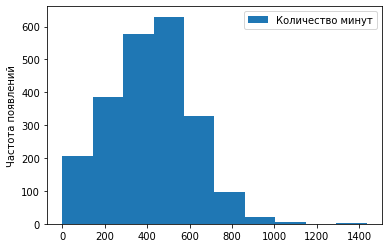

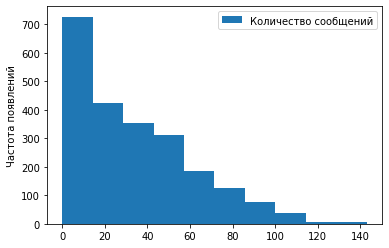

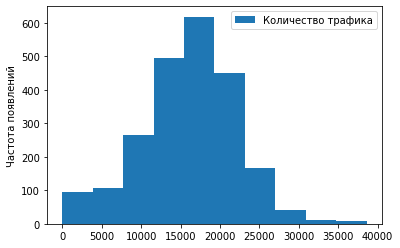

In [36]:
data_analysis = data_smart[['duration', 'count', 'mb_used']]
data_analysis.rename(columns={'duration': 'Количество минут', 'count': 'Количество сообщений', 'mb_used': 'Количество трафика'}, inplace=True)
for column in data_analysis.columns:
    data_analysis.plot(y=column, kind='hist')
    plt.ylabel('Частота появлений')

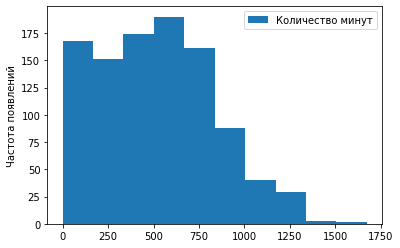

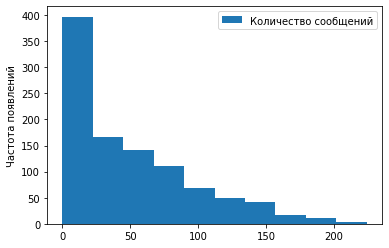

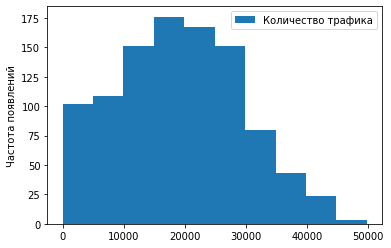

In [37]:
data_analysis = data_ultra[['duration', 'count', 'mb_used']]
data_analysis.rename(columns={'duration': 'Количество минут', 'count': 'Количество сообщений', 'mb_used': 'Количество трафика'}, inplace=True)
for column in data_analysis.columns:
    data_analysis.plot(y=column, kind='hist')
    plt.ylabel('Частота появлений')


Распределения параметров "длительность звонка", "количество сообщений" и "количество использованного трафика" имеют совершенно разный вид у пользователей разных тарифов.

Видим, что пользователи тарифа "Ультра" никогда не используют дополнительные минуты и сообщения вне пакета, но им не всегда хватает оплаченного интернет-трафика.

Пользователи тарифа "Смарт" стараются "уложиться" в выделеные им лимиты звонков, сообщений и трафика. На гистограммах видим резкий спад значений после включенных в пакет 500 минут разговора, 50 сообщений и 15 Гб трафика, но все же им приходится покупать дополнительные минуты, сообщения и мегабайты.


In [38]:
data_smart['profit'].describe()

count    2253.000000
mean     1226.070111
std       786.615448
min       550.000000
25%       550.000000
50%       954.132812
75%      1660.539062
max      6711.015625
Name: profit, dtype: float64

<a id='comment9'></a>

In [39]:
data_smart['profit'].sum()

2762335.9609375

In [40]:
data_ultra['profit'].describe()

count    1006.000000
mean     2058.222685
std       352.917100
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4743.310547
Name: profit, dtype: float64

In [41]:
data_ultra['profit'].sum()

2070572.021484375

### Вывод


Пользователей тарифа "Смарт" в два раза меньше, чем "Ультра". Это логично - люди стараются экономить, а тариф "Смарт" гораздо дешевле. Однако пользователям за эти деньги сильно не хватает полученного пакета услуг, а стоимость дополнительных довольно высока.

В итоге мы видим, что пользователи тарифа "Ультра" никогда не переплачивают за звонки и сообщения и редко - за интернет-трафик. При этом максимальная ежемесячная прибыль по ним 4736 рублей. Это значение чрезвычайно выбивается из общей массы - преобладающая часть пользователей платит лишь 1950 рублей за тариф.

У пользователей тарифа "Смарт" ситуация иная. Они часто переплачивают за дополнительные услуги и в среднем их ежемесячная плата составляет 1191 рубль, при этом максимальная - аж 6543 рубля! Гораздо больше, чем в тарифе "Ультра". Как следствие, за 2018 год компания больше заработала на пользователях тарифа "Смарт".


<a id='section4'></a>
## Шаг 4. Проверка гипотез


Проверим несколько гипотез.



Во-первых, проверим различается ли средняя выручка пользователей тарифов "Смарт" и "Ультра".


In [43]:
smart_group = data_smart['profit']
ultra_group = data_ultra['profit']


Для проверки среднего значения для двух генеральных совокупностей, используем метод <i>ttest_ind</i>.


In [44]:
result = st.ttest_ind(smart_group, ultra_group, equal_var=False)
print('p-значение:', result.pvalue)
#примем уровень значимости 0.05
alpha = .05
if (result.pvalue < alpha):
    print('Отвергаем гипотезу')
else:
    print('Нет причин отвергать гипотезу')

p-значение: 8.768815933955896e-305
Отвергаем гипотезу



Следующая гипотеза: отличается ли средняя выручка пользователей из Москвы от выручки пользователей из других регионов.


In [46]:
moscow_group = data.query('city == "Москва"')['profit']
city_group = data.query('city!="Москва"')['profit']

In [47]:
result = st.ttest_ind(moscow_group, city_group, equal_var=False)
print('p-значение:', result.pvalue)
#примем уровень значимости 0.05
alpha = .05
if (result.pvalue < alpha):
    print('Отвергаем гипотезу')
else:
    print('Нет причин отвергать гипотезу')

p-значение: 0.360639307702853
Нет причин отвергать гипотезу


В данном случае нет причин отвергать нулевую гипотезу о равенстве средних. Значит можно предположить, что средние выручки пользователей из Москвы и из других регионов не отличаются.


При проверке этой гипотезы мы получили статистически значимое отличие и средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.


<a id='section5'></a>
## Шаг 5. Общий вывод


В процессе этой работы мы проанализировали поведение пользователей двух тарифов "Смарт" и "Ультра" компании "Мегалайн". 

Тариф "Смарт" кажется наиболее выгодным клиентам - ежемесячная плата за него в три раза меньше, чем за тариф "Ультра" и, хотя количество включенных в пакет минут разговора и количества сообщений непропорционально меньше, но пользователи уверены, что им этого хватит. Исследование показало, что пользователям тарифа "Ультра" никогда не приходится докупать дополнительные минуты и сообщения, и в целом за год выручка от них меньше в полтора раза. Максимальная ежемесячная прибыль от пользователей "Смарт" - больше 6000 рублей. Это в 10 раз больше абонентской платы. Скупой платит дважды?

Также в данной работе мы проверили две статистические гипотезы: о различии средней выручки пользователей тарифов и о различии средней выручки пользователей из Москвы и из других регионов. <font color='purple'> Первая гипотеза подтвердилась, вторую же пришлось отвергнуть.</font>

В общем можно сделать вывод, что компании "Мегалайн" выгоднее продвигать тариф "Смарт" - пользователи этого тарифа приносят больше денег.
